**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../../../../../Datasets/Flows/train.csv")
display(df_train)

orig_pkts  orig_ip_bytes  resp_ip_bytes  flow_duration  fwd_pkts_tot  \
0        -0.386850      -0.251921      -0.435892      -0.266511     -0.094886   
1         0.015827       0.156381      -0.435892      -0.259216     -0.094886   
2         0.015827      -0.079178       2.288301      -0.266393     -0.094886   
3        -0.386850      -0.251921      -0.435892      -0.266511     -0.094886   
4         0.015827      -0.079178       2.288301      -0.266466     -0.094886   
...            ...            ...            ...            ...           ...   
2204854  -0.386850      -0.251921      -0.435892      -0.266511     -0.094886   
2204855   1.626537       0.886612      -0.435892       3.869142     -0.040128   
2204856  -0.386850      -0.251921      -0.435892      -0.266511     -0.094886   
2204857  -0.386850      -0.251921      -0.435892      -0.266511     -0.094886   
2204858  -0.386850      -0.251921      -0.435892      -0.266511     -0.094886   

         bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0           -0.558002          -0.105188                  0         -0.115688   
1            0.873804          -0.105188                  0         -0.110322   
2            0.157901          -0.105188                  0          0.215342   
3           -0.558002          -0.105188                  0         -0.115688   
4            0.157901          -0.105188                  0          0.755726   
...               ...                ...                ...               ...   
2204854     -0.558002          -0.105188                  0         -0.115688   
2204855      3.021512           0.030020                  0         -0.115640   
2204856     -0.558002          -0.105188                  0         -0.115688   
2204857     -0.558002          -0.105188                  0         -0.115688   
2204858     -0.558002          -0.105188                  0         -0.115688   

         bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  \
0               -0.115971          -0.115846      -0.699567   
1               -0.105221          -0.107789       3.184633   
2                0.215649           0.215526       1.242533   
3               -0.115971          -0.115846      -0.699567   
4                0.756998           0.756468       1.242533   
...                   ...                ...            ...   
2204854         -0.115971          -0.115846      -0.699567   
2204855         -0.115924          -0.115798       1.242533   
2204856         -0.115971          -0.115846      -0.699567   
2204857         -0.115971          -0.115846      -0.699567   
2204858         -0.115971          -0.115846      -0.699567   

         fwd_header_size_tot  bwd_header_size_tot  fwd_PSH_flag_count  \
0                  -0.097939            -0.448050           -0.098841   
1                  -0.084263             1.157904           -0.098841   
2                  -0.087682             0.053810           -0.098841   
3                  -0.097939            -0.448050           -0.098841   
4                  -0.087682             0.053810           -0.098841   
...                      ...                  ...                 ...   
2204854            -0.097939            -0.448050           -0.098841   
2204855            -0.029558             3.566835            0.036313   
2204856            -0.097939            -0.448050           -0.098841   
2204857            -0.097939            -0.448050           -0.098841   
2204858            -0.097939            -0.448050           -0.098841   

         flow_ACK_flag_count  fwd_pkts_payload.min  fwd_pkts_payload.max  \
0                  -0.103006             -0.277650             -0.077738   
1                  -0.061976             -0.277650             -0.077738   
2                  -0.089329             -0.277650             -0.077738   
3                  -0.103006             -0.277650             -0.077738   
4                  -0.089329             -0.27765

In [4]:
df_test = pd.read_csv("../../../../../Datasets/Flows/test.csv")
display(df_test)

orig_pkts  orig_ip_bytes  resp_ip_bytes  flow_duration  fwd_pkts_tot  \
0       -0.386850      -0.251921      -0.435892      -0.266511      0.028319   
1       -0.386850      -0.251921      -0.435892      -0.266511     -0.094886   
2        0.015827      -0.079178       2.288301      -0.266456     -0.094886   
3        0.821182       0.470459      -0.435892      -0.264284     -0.067507   
4        0.821182       0.470459      -0.435892      -0.264118     -0.067507   
...           ...            ...            ...            ...           ...   
734949  -0.386850      -0.251921      -0.435892      -0.266511     -0.094886   
734950   0.015827      -0.079178       2.288301      -0.266403     -0.094886   
734951  -0.386850      -0.251921      -0.435892      -0.266511     -0.094886   
734952   0.821182       0.470459      -0.435892      -0.264601     -0.067507   
734953  -0.386850      -0.251921      -0.435892      -0.266511     -0.094886   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0          -0.558002           0.030020                  0         -0.115688   
1          -0.558002          -0.105188                  0         -0.115688   
2           0.157901          -0.105188                  0          0.594495   
3           1.589706          -0.024063                  3         -0.062964   
4           1.589706          -0.024063                  3         -0.066623   
...              ...                ...                ...               ...   
734949     -0.558002          -0.105188                  0         -0.115688   
734950      0.157901          -0.105188                  0          0.246586   
734951     -0.558002          -0.105188                  0         -0.115688   
734952      1.589706          -0.024063                  3         -0.054227   
734953     -0.558002          -0.105188                  0         -0.115688   

        bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  \
0              -0.115971          -0.115846      -0.699567   
1              -0.115971          -0.115846      -0.699567   
2               0.595479           0.595071       1.242533   
3              -0.063154          -0.063068       1.242533   
4              -0.066819          -0.066730       1.242533   
...                  ...                ...            ...   
734949         -0.115971          -0.115846      -0.699567   
734950          0.246948           0.246802       1.242533   
734951         -0.115971          -0.115846      -0.699567   
734952         -0.054401          -0.054322       1.242533   
734953         -0.115971          -0.115846      -0.699567   

        fwd_header_size_tot  bwd_header_size_tot  fwd_PSH_flag_count  \
0                  0.038824            -0.448050            0.036313   
1                 -0.097939            -0.448050           -0.098841   
2                 -0.087682             0.053810           -0.098841   
3                 -0.087682             0.154183           -0.098841   
4                 -0.087682             0.154183           -0.098841   
...                     ...                  ...                 ...   
734949            -0.097939            -0.448050           -0.098841   
734950            -0.087682             0.053810           -0.098841   
734951            -0.097939            -0.448050           -0.098841   
734952            -0.087682             0.154183           -0.098841   
734953            -0.097939            -0.448050           -0.098841   

        flow_ACK_flag_count  fwd_pkts_payload.min  fwd_pkts_payload.max  \
0                  0.033761              -0.27765             -0.032023   
1                 -0.103006              -0.27765             -0.077738   
2                 -0.089329              -0.27765             -0.077738   
3                 -0.103006               1.55421              0.188933   
4                 -0.103006               1.55421              0.188933   
...                     ..

---------------------------------------

**Create Model & Train Model**

In [5]:
df_train = df_train.drop('is_attack', axis=1)
df_test = df_test.drop('is_attack', axis=1)

In [6]:
x_columns = df_train.columns.drop('traffic')

le = LabelEncoder()
le.fit(df_train["traffic"].values)

x = df_train[x_columns].values
y = df_train["traffic"].values
y = le.transform(y)

In [7]:
x_columns_val = df_test.columns.drop('traffic')

le = LabelEncoder()
le.fit(df_test["traffic"].values)

x_val = df_test[x_columns].values
y_val = df_test["traffic"].values
y_val = le.transform(y_val)

In [8]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [9]:
x_test.shape,y_test.shape

((551215, 126), (551215,))

In [10]:
x_train.shape,y_train.shape

((1653644, 126), (1653644,))

In [11]:
x_val.shape, y_val.shape

((734954, 126), (734954,))

In [12]:
import numpy as np

# Random state definition
random_state=42
np.random.seed(random_state)

In [13]:
from sklearn import metrics

# Classification Metrics: Accuracy, Recall, Precision & F1Score
def compute_metrics(y_test, pred):
    print('Accuracy:', metrics.accuracy_score(y_test, pred))
    print('Recall:', metrics.recall_score(y_test, pred, average = 'weighted'))
    print('Precision:', metrics.precision_score(y_test, pred, average = 'weighted'))
    print('F1-Score:', metrics.f1_score(y_test, pred, average = 'weighted'))

In [14]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

def extra_tree_classifier(x_train, y_train, x_columns):
    # Usage of ExtraTreesClassifier for feature selection
    extra_tree_forest = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=2, random_state=random_state)
    extra_tree_forest.fit(x_train, y_train)
    feature_importances = extra_tree_forest.feature_importances_
    feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

    # Plot the feature importances
    plt.rcParams["figure.figsize"] = (70, 40)
    plt.bar(x_columns, feature_importance_normalized, align='center')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Comparison of different feature importances in the current dataset')
    plt.xticks(rotation=90)
    plt.show()

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

ATTACKS = [
    'Apache Killer', 'ARP Spoofing', 
    'CAM Overflow', 'MQTT Malaria', 
    'Netscan', 'Normal', 
    'RUDY', 'SlowLoris', 
    'SlowRead'
]

def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test
            
    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels= ATTACKS)
        
    # Plot size
    fig, ax = plt.subplots(figsize=(11,11))
    
    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation=0, labelpad=20)
    ax.set_ylabel('True labels', rotation=90, labelpad=20)

    ax.tick_params(axis='x', pad=30)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center', va='center')
    ax.tick_params(axis='y', pad=30)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='center', va='center')
    
    cmd.plot(ax=ax, cmap=plt.cm.Blues)

In [16]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshowac(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

[METRICS] Decision Tree Classifier
Accuracy: 0.9997414804191826
Recall: 0.9997414804191826
Precision: 0.9997414788649837
F1-Score: 0.9997414717524389

[CMATRIX] Decision Tree Confusion Matrix
CPU times: user 17.8 s, sys: 82.3 ms, total: 17.9 s
Wall time: 17.9 s


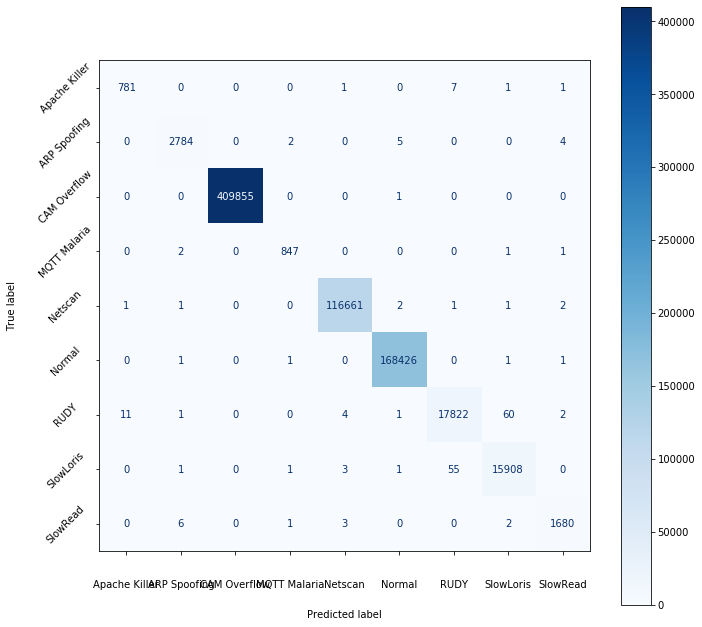

In [17]:
%%time

# Algorithm: RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators=5, random_state=random_state)
forest.fit(x_train, y_train)

# Validation
forest_validation_prediction = forest.predict(x_val)

print("[METRICS] Random Forest Classifier (Validation Set)")
compute_metrics(y_val, forest_validation_prediction)

print("\n[CMATRIX] Random Forest Confusion Matrix (Validation Set)")
conf_matrix(y_val, forest_validation_prediction)